## Importing Libraries needed to do Data Analysis

In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Load Data From csv

In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity      date      time payment_method  rating  profit_margin  
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48

 ### Create A MySQL Database and table then import the dataset to table

In [2]:
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'sun_god_nika_luffy',
    password = 'HarHarMahadev'
)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS st_project_1")
print("Database Created Successfully")


Database Created Successfully


In [4]:
conn.database = "st_project_1"

In [6]:

cursor.execute("""
CREATE TABLE IF NOT EXISTS walmart_dataset (
Invoice_ID INT,
Branch VARCHAR(50),
City VARCHAR(60),
Category VARCHAR(70),
Unit_Price VARCHAR(20),
Quantity INT,
Date DATE,
Time TIME,
Payment VARCHAR(40),
Rating FLOAT,
Profit_Margin FLOAT
)
"""
              )
print("Table Created Successfully")


Table Created Successfully


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y').dt.date
for i, row in df.iterrows():
    cursor.execute("""
        INSERT INTO walmart_dataset (
            Invoice_ID, Branch, City, Category, Unit_Price,
            Quantity, Date, Time, Payment, Rating, Profit_Margin
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['invoice_id'], row['Branch'], row['City'], row['category'], row['unit_price'],
        row['quantity'], row['date'], row['time'], row['payment_method'], row['rating'], row['profit_margin']
    ))

conn.commit()

### Check if all the data has been populated form csv file

In [10]:
cursor.execute("SELECT * FROM walmart_dataset LIMIT 10")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

row = pd.DataFrame(rows, columns=columns)
print(row.T)

                               0                       1                   2  \
Invoice_ID                     1                       2                   3   
Branch                   WALM003                 WALM048             WALM067   
City                 San Antonio               Harlingen         Haltom City   
Category       Health and beauty  Electronic accessories  Home and lifestyle   
Unit_Price                $74.69                  $15.28              $46.33   
Quantity                       7                       5                   7   
Date                  2019-01-05              2019-03-08          2019-03-03   
Time             0 days 13:08:00         0 days 10:29:00     0 days 13:23:00   
Payment                  Ewallet                    Cash         Credit card   
Rating                       9.1                     9.6                 7.4   
Profit_Margin               0.48                    0.48                0.33   

                               3       

## Now we will explore data to understand the distribution of data, their data types and identify the problems
- info() is used to understand the structure and health of the dataset.
- head() shows the actual values in the first 5 rows.
- tail() shows the values in last 5 rows.
- describe() shows statistical summary of numeric columns such as count, mean, std, min
- isnull() is a conditional statement to see if a value in row is null or not and when paired with sum shows count on null rows in columns
- nunique() is used to show distinct values in each column

In [11]:
df1 = pd.read_sql("SELECT * FROM walmart_dataset",conn)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Invoice_ID     10051 non-null  int64          
 1   Branch         10051 non-null  object         
 2   City           10051 non-null  object         
 3   Category       10051 non-null  object         
 4   Unit_Price     10020 non-null  object         
 5   Quantity       10020 non-null  float64        
 6   Date           10051 non-null  object         
 7   Time           10051 non-null  timedelta64[ns]
 8   Payment        10051 non-null  object         
 9   Rating         10051 non-null  float64        
 10  Profit_Margin  10051 non-null  float64        
dtypes: float64(3), int64(1), object(6), timedelta64[ns](1)
memory usage: 863.9+ KB


/tmp/ipykernel_8093/415558984.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql("SELECT * FROM walmart_dataset",conn)


In [14]:
df1.head()

Invoice_ID   Branch         City                Category Unit_Price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   Quantity        Date            Time      Payment  Rating  Profit_Margin  
0       7.0  2019-01-05 0 days 13:08:00      Ewallet     9.1           0.48  
1       5.0  2019-03-08 0 days 10:29:00         Cash     9.6           0.48  
2       7.0  2019-03-03 0 days 13:23:00  Credit card     7.4           0.33  
3       8.0  2019-01-27 0 days 20:33:00      Ewallet     8.4           0.33  
4       7.0  2019-02-08 0 days 10:37:00      Ewallet     5.3           0.48

In [15]:
df1.tail()

Invoice_ID   Branch        City             Category Unit_Price  \
10046        9996  WALM056     Rowlett  Fashion accessories        $37   
10047        9997  WALM030  Richardson   Home and lifestyle        $58   
10048        9998  WALM050    Victoria  Fashion accessories        $52   
10049        9999  WALM032       Tyler   Home and lifestyle        $79   
10050       10000  WALM069    Rockwall  Fashion accessories        $62   

       Quantity        Date            Time      Payment  Rating  \
10046       3.0  2023-08-03 0 days 10:10:00         Cash     3.0   
10047       2.0  2021-02-22 0 days 14:20:00         Cash     7.0   
10048       3.0  2023-06-15 0 days 16:00:00  Credit card     4.0   
10049       2.0  2021-02-25 0 days 12:25:00         Cash     7.0   
10050       3.0  2020-09-26 0 days 09:48:00         Cash     3.0   

       Profit_Margin  
10046           0.33  
10047           0.48  
10048           0.48  
10049           0.48  
10050           0.33

In [16]:
df1.describe()

Invoice_ID      Quantity                       Time        Rating  \
count  10051.000000  10020.000000                      10051  10051.000000   
mean    5025.741220      2.353493  0 days 15:35:01.552084369      5.825659   
std     2901.174372      1.602658  0 days 04:02:23.096608491      1.763991   
min        1.000000      1.000000            0 days 06:01:00      3.000000   
25%     2513.500000      1.000000            0 days 12:55:00      4.000000   
50%     5026.000000      2.000000            0 days 16:21:00      6.000000   
75%     7538.500000      3.000000            0 days 18:45:00      7.000000   
max    10000.000000     10.000000            0 days 23:00:00     10.000000   

       Profit_Margin  
count   10051.000000  
mean        0.393791  
std         0.090669  
min         0.180000  
25%         0.330000  
50%         0.330000  
75%         0.480000  
max         0.570000

In [17]:
df1.isnull().sum()

Invoice_ID        0
Branch            0
City              0
Category          0
Unit_Price       31
Quantity         31
Date              0
Time              0
Payment           0
Rating            0
Profit_Margin     0
dtype: int64

In [18]:
df1.nunique()

Invoice_ID       10000
Branch             100
City                98
Category             6
Unit_Price        1008
Quantity            10
Date              1460
Time              1001
Payment              3
Rating              62
Profit_Margin        6
dtype: int64

### What we Understood from the Data Exploration
- Some transactions are incomplete as 62 rows of both Unit_Price and Quantity is missing
- This affects both total amount and any profit calculation
- We also learnt that Invoice_ID is duplicate a lot as we have 10051 rows and only 10000 unique Invoice_ID
- Unit_Price is stored as String since we have $ sign before it we can replace it so that we can easily do numeric calculation
- Date is Object instead it should be datetime

#### We will first drop all rows with null Unit_Price and Quantity 

In [19]:
df1 = df1[~(df1['Unit_Price'].isnull() & df1['Quantity'].isnull())]

In [21]:
df1.info() # As we drop these rows we see all 62 rows has been dropped which suggest Quantity and Unit_price null rows were same

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Invoice_ID     10020 non-null  int64          
 1   Branch         10020 non-null  object         
 2   City           10020 non-null  object         
 3   Category       10020 non-null  object         
 4   Unit_Price     10020 non-null  object         
 5   Quantity       10020 non-null  float64        
 6   Date           10020 non-null  object         
 7   Time           10020 non-null  timedelta64[ns]
 8   Payment        10020 non-null  object         
 9   Rating         10020 non-null  float64        
 10  Profit_Margin  10020 non-null  float64        
dtypes: float64(3), int64(1), object(6), timedelta64[ns](1)
memory usage: 939.4+ KB


#### Now we will clean Unit_Price and drop $ sign so that we can easily use it for Statistical Analysis

In [22]:
df1['Unit_Price'] = df1['Unit_Price'].str.replace('$', '', regex=False)
df1['Unit_Price'] = pd.to_numeric(df1['Unit_Price'], errors='coerce') 

#### We will similarly using Pandas DataFrame carefully convert Date from object to DateTime

In [23]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')  

#### We are now looking in if the Invoice Ids being really Duplicated or if they are from same persons multiple purchases

In [24]:
# Group by Invoice_ID and Date, count how many unique times
time_variation = df1.groupby(['Invoice_ID', 'Date'])['Time'].nunique().reset_index(name='unique_times')

# Filter for reused invoice IDs with different times
invoice_duplicates = time_variation[time_variation['unique_times'] > 1]

print(f"Number of Invoice IDs reused on the same day with different times: {len(invoice_duplicates)}")


Number of Invoice IDs reused on the same day with different times: 0


In [25]:
df1.info() # Now we have almost cleaned almost all data

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Invoice_ID     10020 non-null  int64          
 1   Branch         10020 non-null  object         
 2   City           10020 non-null  object         
 3   Category       10020 non-null  object         
 4   Unit_Price     10020 non-null  float64        
 5   Quantity       10020 non-null  float64        
 6   Date           10020 non-null  datetime64[ns] 
 7   Time           10020 non-null  timedelta64[ns]
 8   Payment        10020 non-null  object         
 9   Rating         10020 non-null  float64        
 10  Profit_Margin  10020 non-null  float64        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4), timedelta64[ns](1)
memory usage: 939.4+ KB


In [26]:
df1.head() #After doing the below our Time has Changed to 

Invoice_ID   Branch         City                Category  Unit_Price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   Quantity       Date            Time      Payment  Rating  Profit_Margin  
0       7.0 2019-01-05 0 days 13:08:00      Ewallet     9.1           0.48  
1       5.0 2019-03-08 0 days 10:29:00         Cash     9.6           0.48  
2       7.0 2019-03-03 0 days 13:23:00  Credit card     7.4           0.33  
3       8.0 2019-01-27 0 days 20:33:00      Ewallet     8.4           0.33  
4       7.0 2019-02-08 0 days 10:37:00      Ewallet     5.3           0.48

#### Now we know that we can't put time like this in our Time columns in table like that so we will convert it to HH:MM

In [27]:
df1['Time'] = df1['Time'].apply(lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:00")

In [30]:
cursor.execute("DROP TABLE walmart_cleaned_dataset")

In [31]:
cursor.execute(
    """CREATE TABLE walmart_cleaned_dataset (
    Invoice_ID INT,
    Branch VARCHAR(50),
    City VARCHAR(60),
    Category VARCHAR(70),
    Unit_Price FLOAT,
    Quantity FLOAT,
    Date DATE,
    Time TIME,
    Payment_method VARCHAR(40),
    Rating FLOAT,
    Profit_Margin FLOAT
)
"""
)



In [33]:
for _, row in df1.iterrows():
    cursor.execute("""
        INSERT INTO walmart_cleaned_dataset VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Invoice_ID'], row['Branch'], row['City'], row['Category'], row['Unit_Price'],
        row['Quantity'], row['Date'].date(), row['Time'], row['Payment'], row['Rating'], row['Profit_Margin']
    ))

### Now to see if our data is there and cleaned we will use Panda's DataFrame and SQL query

In [34]:
df_cleaned = pd.read_sql("SELECT * FROM walmart_cleaned_dataset",conn)
df_cleaned.head() 

/tmp/ipykernel_8093/1478101997.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cleaned = pd.read_sql("SELECT * FROM walmart_cleaned_dataset",conn)


Invoice_ID   Branch         City                Category  Unit_Price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   Quantity        Date            Time Payment_method  Rating  Profit_Margin  
0       7.0  2019-01-05 0 days 13:08:00        Ewallet     9.1           0.48  
1       5.0  2019-03-08 0 days 10:29:00           Cash     9.6           0.48  
2       7.0  2019-03-03 0 days 13:23:00    Credit card     7.4           0.33  
3       8.0  2019-01-27 0 days 20:33:00        Ewallet     8.4           0.33  
4       7.0  2019-02-08 0 days 10:37:00        Ewallet     5.3           0.48

##### We will see a subtle difference how in my df_cleaned time is show different than in df1 and why I did that
- First point is that when we were inserting the df1 into walmart_cleaned_dataset after doing data cleaning is that because the time in sql will not consider it as time so I transferred it to HH:MM:SS (Time format of mysql)
- Second point is time is translated differently in Panda's DataFrame so when i call df_cleaned.head() it is translated from sql time 13:07:00 to 0 days 13:07:00 hence why we see it like this.

In [35]:
df_cleaned.dtypes

Invoice_ID                  int64
Branch                     object
City                       object
Category                   object
Unit_Price                float64
Quantity                  float64
Date                       object
Time              timedelta64[ns]
Payment_method             object
Rating                    float64
Profit_Margin             float64
dtype: object

## Feature Engineering

### Add Column for Total_Amount which has Formula Unit_Price*Quantity

In [6]:
from prettytable import PrettyTable as pt # It is a good utility and I am using it a=just now after learning about it

In [37]:
cursor.execute("ALTER TABLE walmart_cleaned_dataset ADD COLUMN Total_Amount FLOAT")

In [38]:
cursor.execute("""
    UPDATE walmart_cleaned_dataset 
    SET Total_Amount = Unit_Price * Quantity
""")

In [7]:
cursor.execute("SELECT Category, Payment_method, Rating, Unit_Price, Quantity,Total_Amount FROM walmart_cleaned_dataset limit 20")
rows = cursor.fetchall()
columns = [i[0] for i in cursor.description]
table = pt()
table.field_names = columns
for row in rows:
    table.add_row(row)
print(table)

+------------------------+----------------+--------+------------+----------+--------------+
|        Category        | Payment_method | Rating | Unit_Price | Quantity | Total_Amount |
+------------------------+----------------+--------+------------+----------+--------------+
|   Health and beauty    |    Ewallet     |  9.1   |   74.69    |   7.0    |     None     |
| Electronic accessories |      Cash      |  9.6   |   15.28    |   5.0    |     None     |
|   Home and lifestyle   |  Credit card   |  7.4   |   46.33    |   7.0    |     None     |
|   Health and beauty    |    Ewallet     |  8.4   |   58.22    |   8.0    |     None     |
|   Sports and travel    |    Ewallet     |  5.3   |   86.31    |   7.0    |     None     |
| Electronic accessories |    Ewallet     |  4.1   |   85.39    |   7.0    |     None     |
| Electronic accessories |    Ewallet     |  5.8   |   68.84    |   6.0    |     None     |
|   Home and lifestyle   |    Ewallet     |  8.0   |   73.56    |   10.0   |    

In [42]:
cursor.execute("SELECT * FROM walmart_cleaned_dataset")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
with open("walmart_cleaned.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    writer.writerows(rows)

### Revenue Trends Across Branch and Categories(Using Pivot Table)
- We will plot a sub graph for this because we can't make graph for every branch as there are almost 100
- I made a graph about which categories and branch worked better and worst.
- Which category had better total revenue than other categories

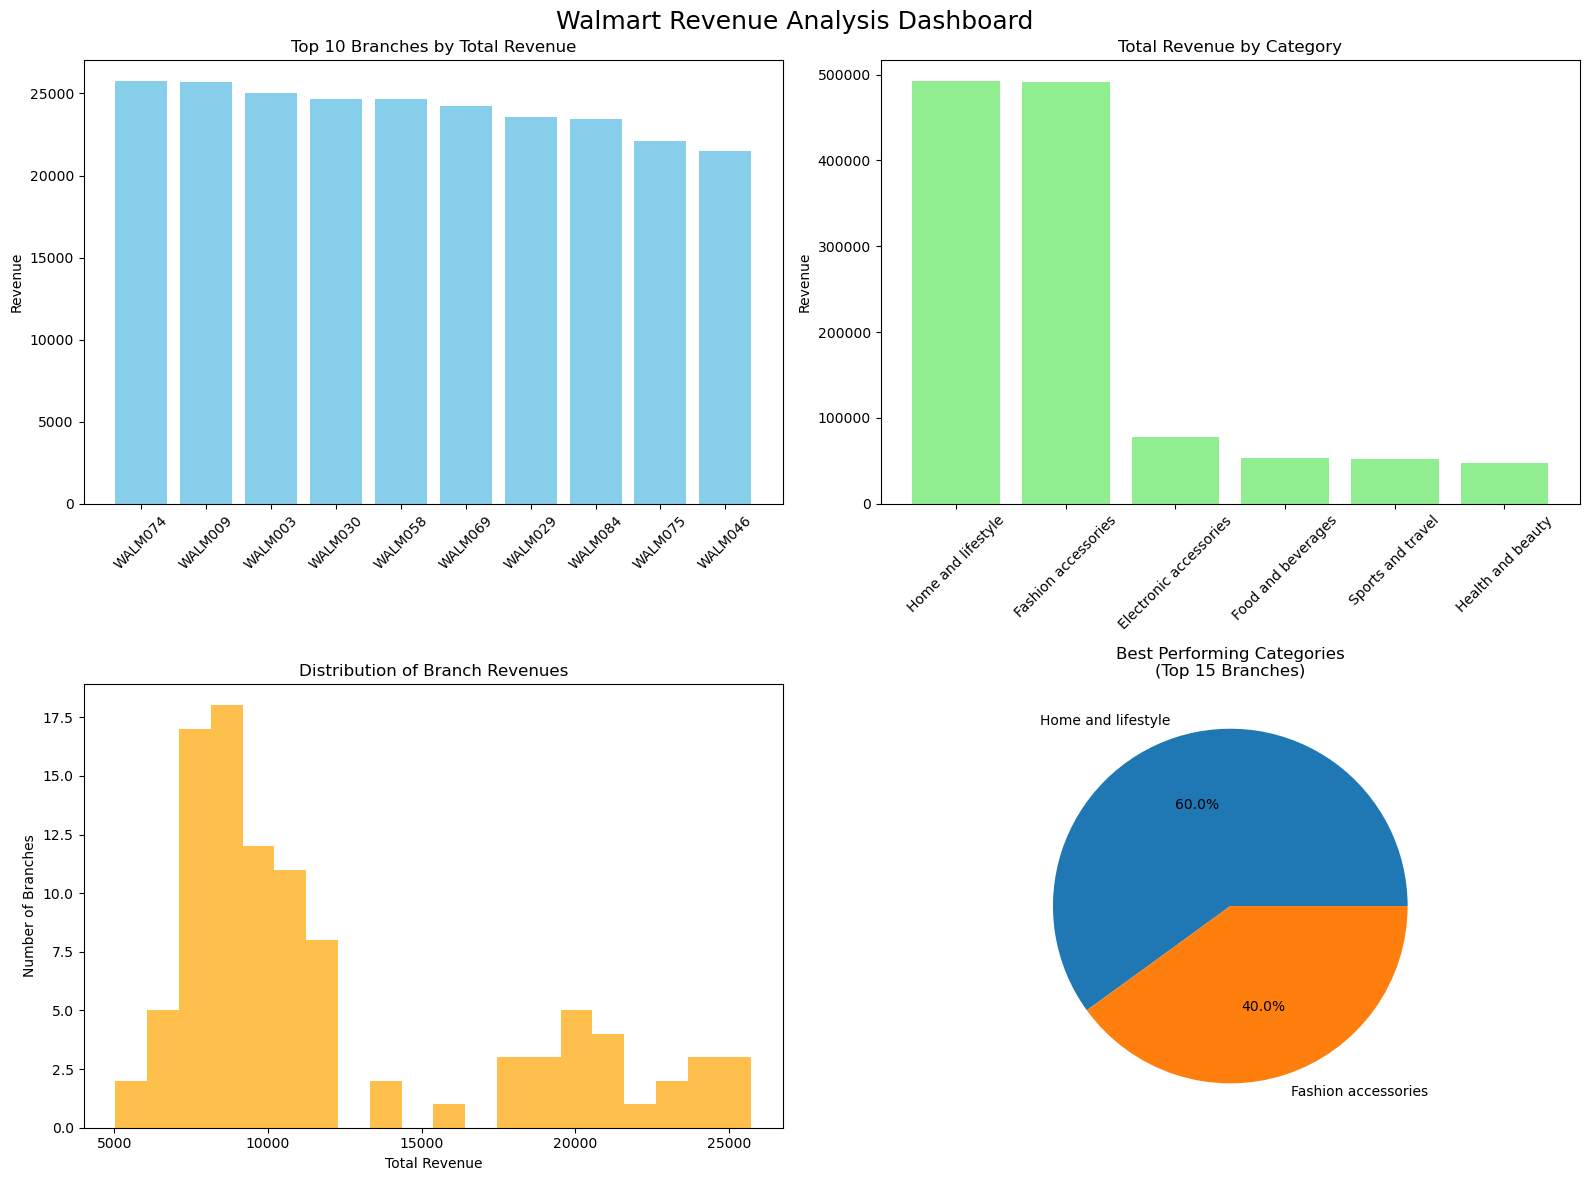

In [8]:
df2 = pd.read_csv("walmart_cleaned.csv")
pivot = df2.pivot_table(values="Total_Amount",index = "Branch", columns = "Category", aggfunc = "sum")
branch_totals = pivot.sum(axis=1).sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Walmart Revenue Analysis Dashboard", fontsize=18, y=0.98)


top_10 = branch_totals.head(10)
axes[0,0].bar(range(len(top_10)), top_10.values, color='skyblue')
axes[0,0].set_title("Top 10 Branches by Total Revenue")
axes[0,0].set_xticks(range(len(top_10)))
axes[0,0].set_xticklabels(top_10.index, rotation=45)
axes[0,0].set_ylabel("Revenue")


category_totals = pivot.sum(axis=0).sort_values(ascending=False)
axes[0,1].bar(range(len(category_totals)), category_totals.values, color='lightgreen')
axes[0,1].set_title("Total Revenue by Category")
axes[0,1].set_xticks(range(len(category_totals)))
axes[0,1].set_xticklabels(category_totals.index, rotation=45)
axes[0,1].set_ylabel("Revenue")


axes[1,0].hist(branch_totals.values, bins=20, alpha=0.7, color='orange')
axes[1,0].set_title("Distribution of Branch Revenues")
axes[1,0].set_xlabel("Total Revenue")
axes[1,0].set_ylabel("Number of Branches")


best_category_per_branch = pivot.idxmax(axis=1)
top_15_branches = branch_totals.head(15).index
best_cat_top15 = best_category_per_branch[top_15_branches]
category_counts = best_cat_top15.value_counts()

axes[1,1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[1,1].set_title("Best Performing Categories\n(Top 15 Branches)")

plt.tight_layout()
plt.show()

#### Identifying Best-Selling Product Categories

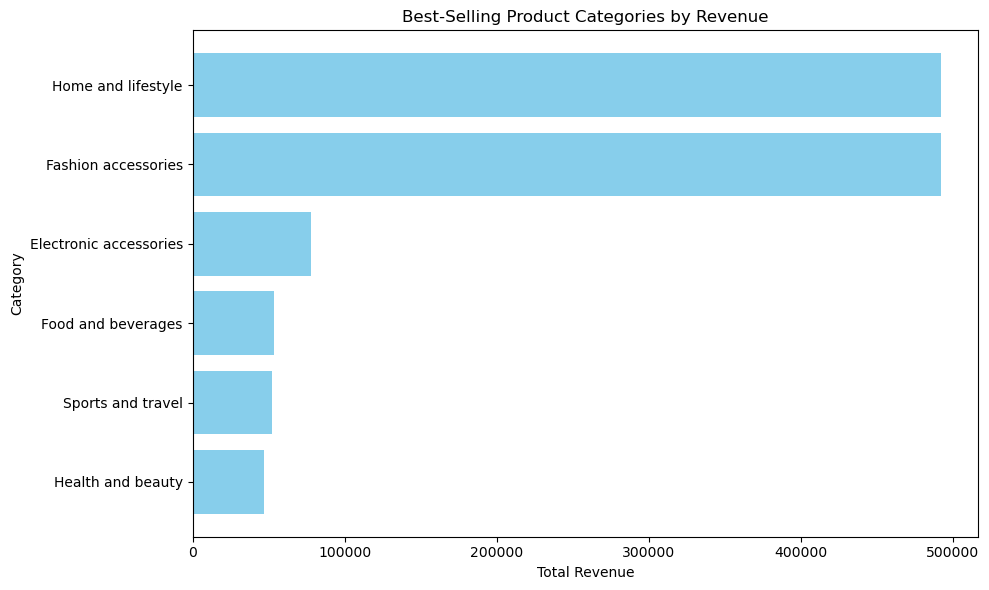

In [10]:
category_revenue = df2.groupby('Category')['Total_Amount'].sum().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(category_revenue.index, category_revenue.values, color='skyblue')
plt.title("Best-Selling Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


#### Sales performance by time, city, and payment method

/tmp/ipykernel_24620/2018014278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour


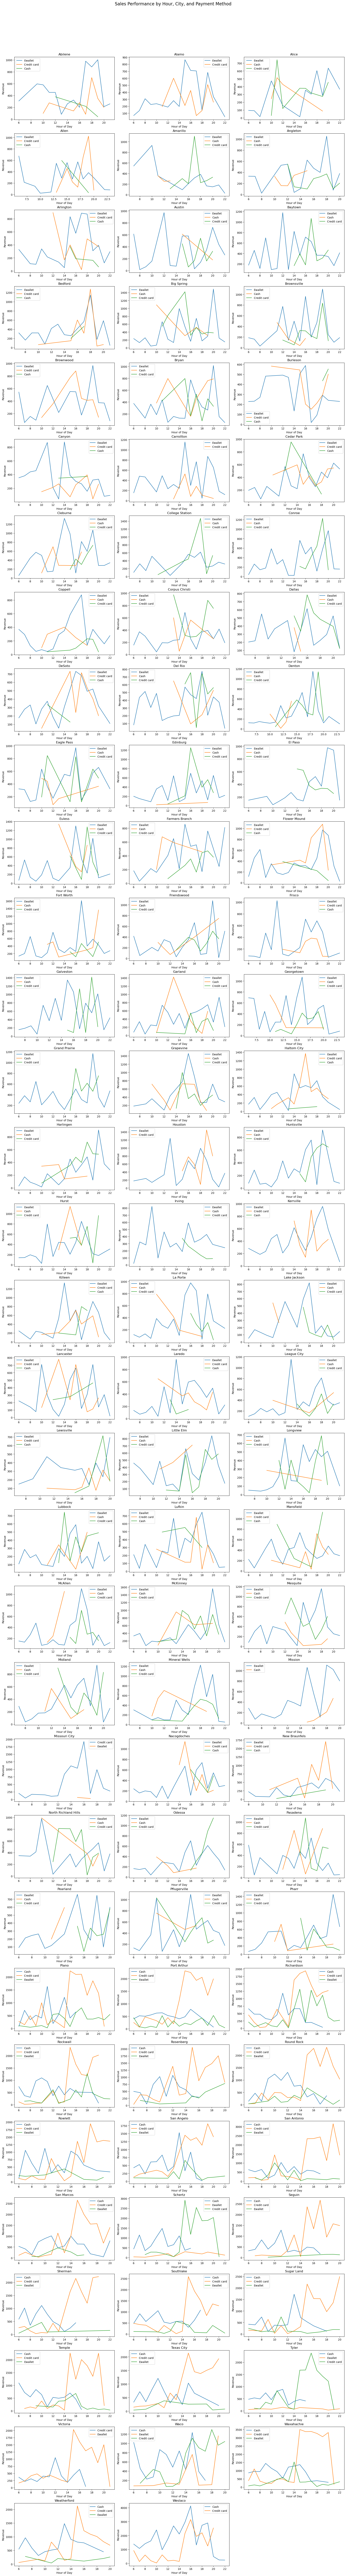

In [42]:
df2['Hour'] = pd.to_datetime(df2['Time']).dt.hour

# Aggregate revenue by City, Hour, and Payment_method
grouped = df2.groupby(['City', 'Hour', 'Payment_method'])['Total_Amount'].sum().reset_index()

# Get unique cities (all, not just 6)
cities = grouped['City'].unique()
n = len(cities)

# Create subplots dynamically
cols = 3  
rows = (n // cols) + (n % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each city separately
for i, city in enumerate(cities):
    ax = axes[i]
    city_data = grouped[grouped['City'] == city]
    for payment in city_data['Payment_method'].unique():
        payment_data = city_data[city_data['Payment_method'] == payment]
        ax.plot(payment_data['Hour'], payment_data['Total_Amount'], label=payment)
    
    ax.set_title(city)
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Revenue")
    ax.legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Sales Performance by Hour, City, and Payment Method", fontsize=16, y=1.02)
plt.show()

#### Analyzing peak sales periods and customer buying patterns.

<Figure size 1000x600 with 0 Axes>

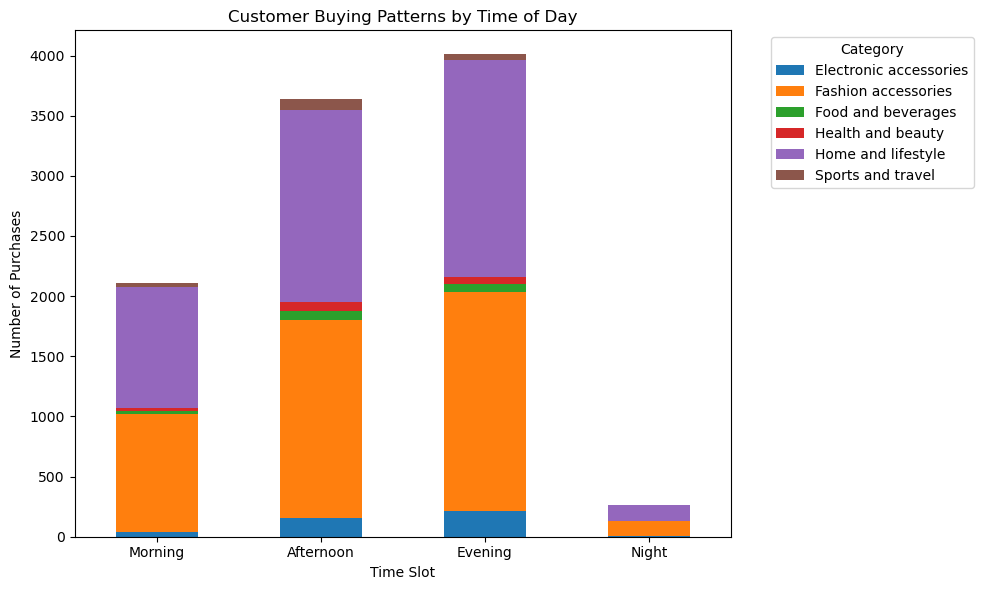

In [43]:
df2['Hour'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.hour

# Define time slots
def time_slot(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df2['Time_Slot'] = df2['Hour'].apply(time_slot)

# Group by Time Slot and Category
category_by_slot = (
    df2.groupby(['Time_Slot', 'Category'])
      .size()
      .unstack(fill_value=0)
      .reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
)

# 1. Stacked Bar Chart
plt.figure(figsize=(10, 6))
category_by_slot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Customer Buying Patterns by Time of Day")
plt.xlabel("Time Slot")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Profit margin analysis by branch and category
- The branch is completely cluttered so now I think we should take top 10-15 branches so that they are readable 

/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

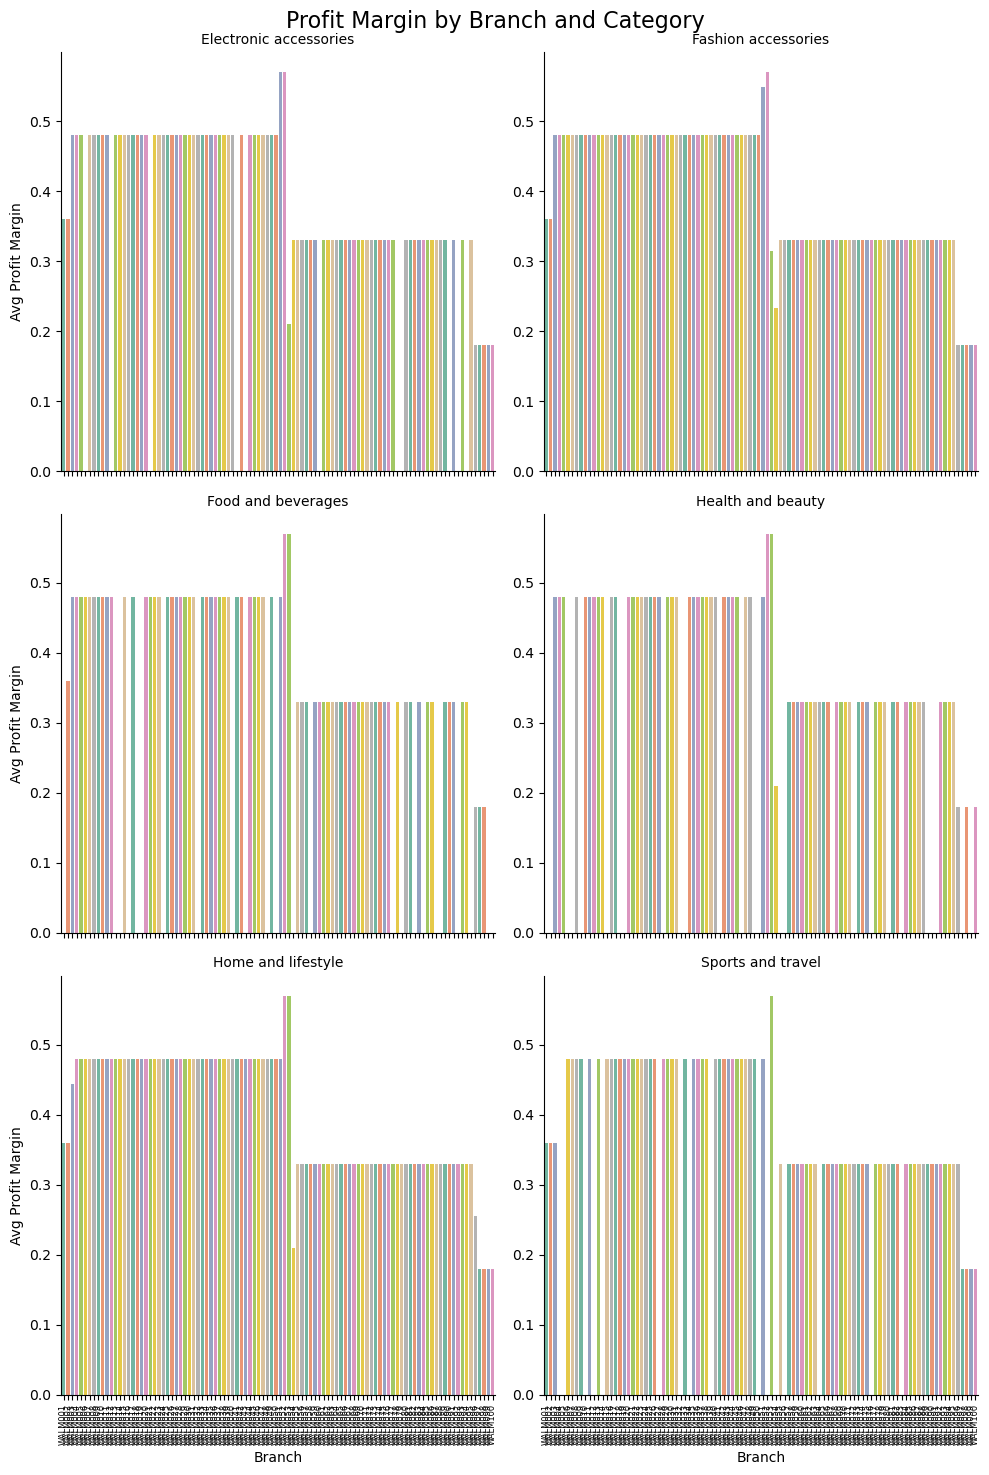

In [49]:
# Sort branches alphabetically for consistency
df_grouped = df2.groupby(['Category', 'Branch'])['Profit_Margin'].mean().reset_index()

# Sort branches for consistency
sorted_branches = sorted(df_grouped['Branch'].unique())

# Create FacetGrid
g = sns.FacetGrid(df_grouped, col='Category', col_wrap=2, height=5, sharey=False)

# Map each subplot
g.map_dataframe(sns.barplot, x='Branch', y='Profit_Margin', order=sorted_branches, palette='Set2')

# Rotate x-axis labels and set proper spacing
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xticks(range(len(sorted_branches)))
    ax.set_xticklabels(sorted_branches, fontsize=6)  # reduce font size to fit

# Titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Branch", "Avg Profit Margin")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Profit Margin by Branch and Category", fontsize=16)

plt.tight_layout()
plt.show()

#### This makes the Graph much more Readable
- Even though we don't get to see all the Branches and Profit Margin for category we get a fair idea about it

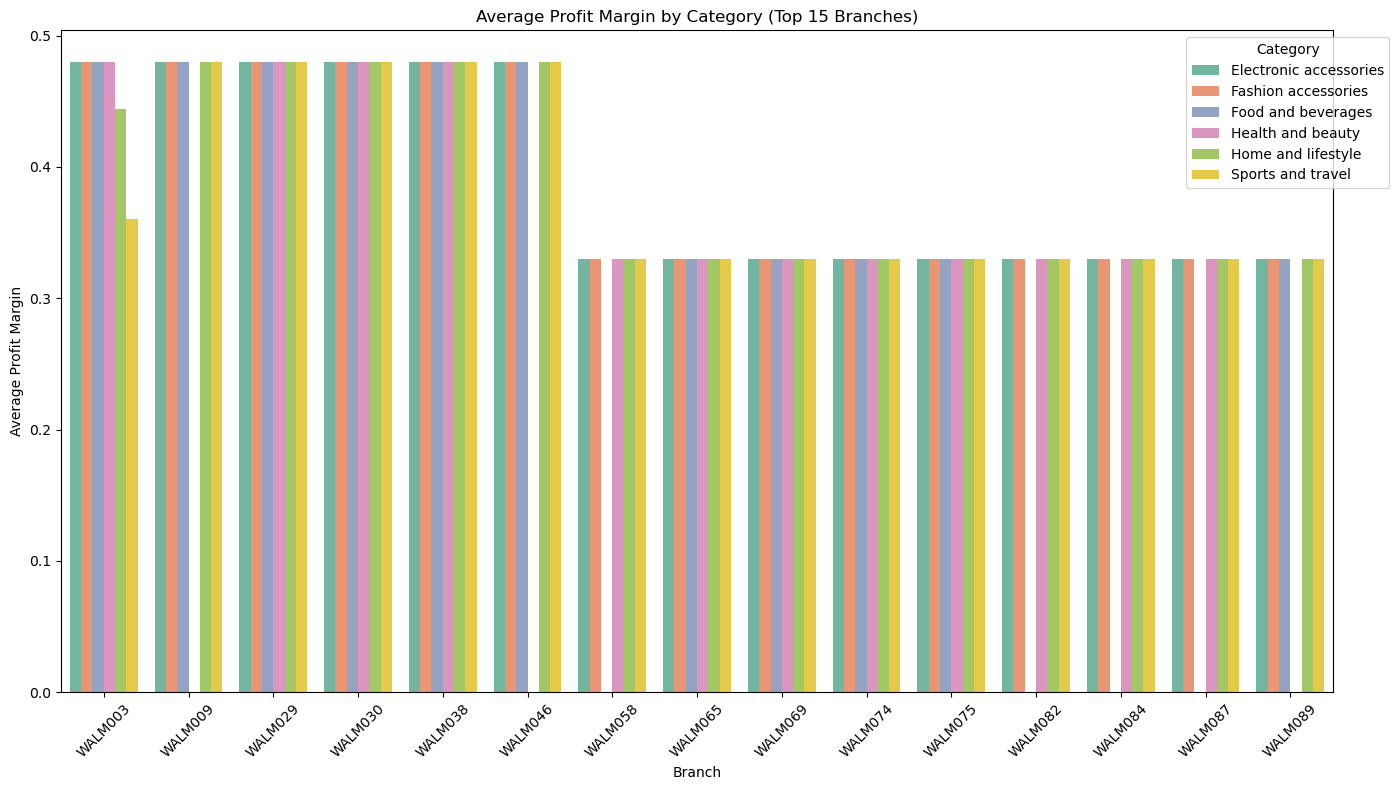

In [51]:
# Find top 15 branches by total revenue
top_branches = (
    df2.groupby('Branch')['Total_Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Filter data
filtered_df = df2[df2['Branch'].isin(top_branches)]

# Group by branch & category for mean profit margin
avg_profit = (
    filtered_df.groupby(['Branch', 'Category'])['Profit_Margin']
    .mean()
    .reset_index()
)

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_profit,
    x='Branch',
    y='Profit_Margin',
    hue='Category',
    palette='Set2'
)

plt.title("Average Profit Margin by Category (Top 15 Branches)")
plt.ylabel("Average Profit Margin")
plt.xlabel("Branch")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()